# Hands-on Practice

Welcome to this hands-on session! 🎉 In this notebook, we’ll guide you through running the code for the **[RecSys Challenge 2025](https://www.recsyschallenge.com/2025/)** so you can gain a deeper understanding of the competition.  

## 📂 The Dataset

The challenge organizers have provided an **anonymized dataset** containing real-world user interaction logs. These logs allow us to create **Universal Behavioral Profiles**, but participants will need to generate and submit behavioral profiles for only a subset of users. These will then be used for **model training and evaluation**.  

The dataset includes six types of user interactions:  

- 🛍️ **product_buy** – When a user purchases a product  
- 🛒 **add_to_cart** – When a user adds an item to their cart  
- ❌ **remove_from_cart** – When a user removes an item from their cart  
- 📄 **product_properties** – Metadata about products  
- 👀 **page_visit** – When a user visits a product page  
- 🔍 **search_query** – When a user searches for something

Now, let’s download the dataset and get started! ⬇️

In [1]:
!wget https://data.recsys.synerise.com/dataset/ubc_data/ubc_data.tar.gz

ERROR: ld.so: object '/opt/conda/lib/libmkl_def.so' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/opt/conda/lib/libmkl_avx2.so' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/opt/conda/lib/libmkl_core.so' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/opt/conda/lib/libmkl_intel_lp64.so' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/opt/conda/lib/libmkl_intel_thread.so' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/opt/conda/lib/libmkl_def.so' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/opt/conda/lib/libmkl_avx2.so' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/opt/conda/lib/libmkl_core.so' from LD_PRE

In [2]:
!tar -xzvf ubc_data.tar.gz

ERROR: ld.so: object '/opt/conda/lib/libmkl_def.so' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/opt/conda/lib/libmkl_avx2.so' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/opt/conda/lib/libmkl_core.so' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/opt/conda/lib/libmkl_intel_lp64.so' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/opt/conda/lib/libmkl_intel_thread.so' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/opt/conda/lib/libmkl_def.so' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/opt/conda/lib/libmkl_avx2.so' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/opt/conda/lib/libmkl_core.so' from LD_PRE

## 📝 Setting Up the Codebase

To work with the dataset and implement our solution, we will use the **baseline** model provided by the competition. Additionally, we have several utility scripts to help.  

Here’s what each component does:  

- **Baseline** – The reference model that we will use to generate **embeddings**.  
- **data_utils** – Utility functions provided by the competition to **split the dataset** properly for the baseline model.  
- **training_pipeline** – The framework used to train a fixed model for internal validation.  
- **validator** – A tool to **assess the correctness** of our implementation.  


Let's clone the official competition repository to get all the necessary code

In [3]:
!git clone https://github.com/Synerise/recsys2025.git

ERROR: ld.so: object '/opt/conda/lib/libmkl_def.so' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/opt/conda/lib/libmkl_avx2.so' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/opt/conda/lib/libmkl_core.so' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/opt/conda/lib/libmkl_intel_lp64.so' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/opt/conda/lib/libmkl_intel_thread.so' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/opt/conda/lib/libmkl_def.so' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/opt/conda/lib/libmkl_avx2.so' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/opt/conda/lib/libmkl_core.so' from LD_PRE

## 🏆 The Challenge

To evaluate our approach, we’ll follow a **three-step process**:  

1️⃣ **Data Splitting** – Partition raw event data into training input, training target, and validation target.  
2️⃣ **Baseline Model** – Generate embeddings using feature aggregation methods.  
3️⃣ **Model Training** – Train and validate using the generated embeddings.  


### 📊 1. Data Splitting 

To simulate competition conditions, we split user event data into **three time windows**:  

- **Input events** – Used to generate user representations.  
- **Train target events** – Used to compute training labels (e.g., purchase propensity).  
- **Validation target events** – Used to assess model performance.  

⚠️ **Warning:** Running the data-splitting script requires a large amount of memory, which **Jupyter Hub cannot handle**. To avoid issues, we have pre-split the data for you. **Use the provided dataset instead of running the script locally.**  

To split the data the following command was used: 

`python -m data_utils.split_data --challenge-data-dir <your_challenge_data_dir>`

### 🔹 2. Baseline Embedding Approach

The baseline model generates Universal Behavioral Profiles using simple feature aggregation:

- **Statistical Features** – Count-based features (e.g., how many times a user added a product to the cart in the past 30 days).

- **Query Features** – Averaged text embeddings for search queries.

Run the following cell:

In [6]:
!cd recsys2025/ && python -m baseline.aggregated_features_baseline.create_embeddings --data-dir ../data --embeddings-dir ../data/embeddings

ERROR: ld.so: object '/opt/conda/lib/libmkl_def.so' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/opt/conda/lib/libmkl_avx2.so' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/opt/conda/lib/libmkl_core.so' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/opt/conda/lib/libmkl_intel_lp64.so' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/opt/conda/lib/libmkl_intel_thread.so' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/opt/conda/lib/libmkl_def.so' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/opt/conda/lib/libmkl_avx2.so' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/opt/conda/lib/libmkl_core.so' from LD_PRE

### 🚀 3. Model Training

To run the model training, the competition uses [neptune](https://docs.neptune.ai) to tracker the experiments 

In [3]:
!pip install -U 'neptune>=1.0'

ERROR: ld.so: object '/opt/conda/lib/libmkl_def.so' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/opt/conda/lib/libmkl_avx2.so' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/opt/conda/lib/libmkl_core.so' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/opt/conda/lib/libmkl_intel_lp64.so' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/opt/conda/lib/libmkl_intel_thread.so' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/opt/conda/lib/libmkl_def.so' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/opt/conda/lib/libmkl_avx2.so' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/opt/conda/lib/libmkl_core.so' from LD_PRE

Once we have embeddings, we train a fixed model for internal validation:

In [ ]:
!cd recsys2025/ && python -m training_pipeline.train --data-dir ../data --embeddings-dir ../data/embeddings --tasks churn propensity_category propensity_sku --log-name exp_20250401 --accelerator gpu --devices auto --disable-relevant-clients-check

ERROR: ld.so: object '/opt/conda/lib/libmkl_def.so' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/opt/conda/lib/libmkl_avx2.so' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/opt/conda/lib/libmkl_core.so' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/opt/conda/lib/libmkl_intel_lp64.so' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/opt/conda/lib/libmkl_intel_thread.so' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/opt/conda/lib/libmkl_def.so' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/opt/conda/lib/libmkl_avx2.so' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/opt/conda/lib/libmkl_core.so' from LD_PRE

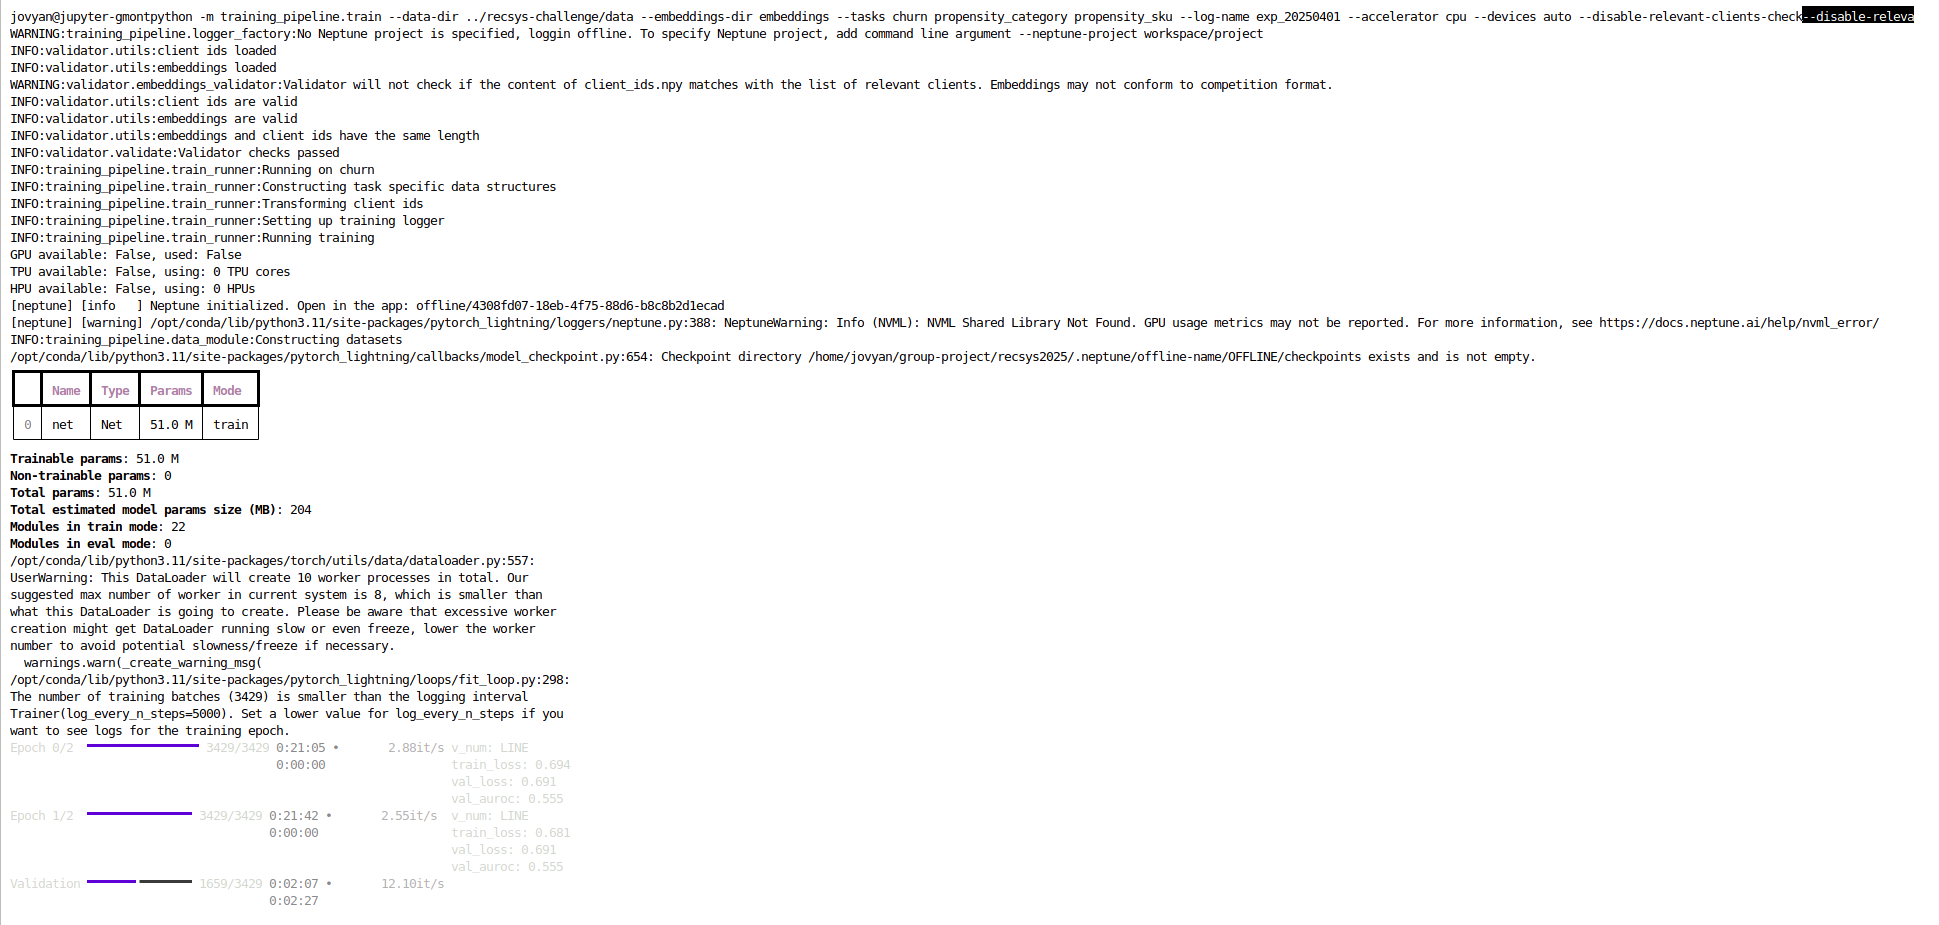